# Importing Libraries 

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split


# Loading Dataset

In [2]:
data = pd.read_csv("Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

# Spliting data into train and test sets

In [4]:
x = data["Text"]
y = data["Language"]

# Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Text Preprocessing

In [6]:
# creating a list for appending the preprocessed text 

datalist = []

for text in x :
    text = re.sub(r'[!@#$(), n"%^*?:;~`0-9]', ' ',text)
    text = re.sub(r'[[]]', ' ',text)
                  
    text = text.lower()
                  
    datalist.append(text)

C:\Users\RUCHIK~1\AppData\Local\Temp/ipykernel_12532/1059643001.py:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ',text)


# Bags of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(datalist).toarray()

# Train Test Splitting

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

# Model Training and Prediction

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)

# Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is: ", ac)

Accuracy is:  0.9782398452611218


# Visualization

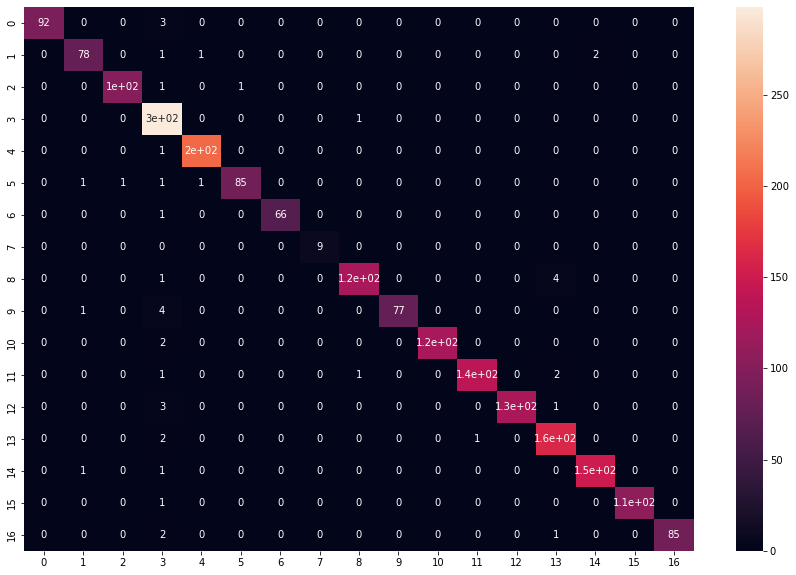

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.show()

In [17]:
def testing(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [18]:
testing("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals")

The langauge is in English


In [19]:
testing("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam
